# Linear Regression (univariable)
Predicting profit of sale point based of city population.

### Import libraries

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Load data

In [2]:
data = pd.read_csv("./data/house-price(area).txt", names=['area', 'price'], header=None)

In [3]:
data.shape

(97, 2)

In [4]:
data.head(5)

,area,price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.tail(5)

,area,price
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [6]:
data.isnull().values.any()

False

### Initial data

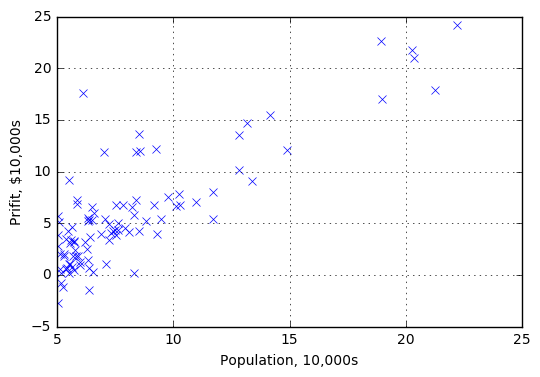

In [7]:
plt.plot(data['area'], data['price'], 'x')
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)

### Gradient descent
Add '1' column for x0 feature

In [8]:
data['x0'] = 1

In [9]:
data.tail(4)

,area,price,x0
93,5.3054,1.98690,1
94,8.2934,0.14454,1
95,13.3940,9.05510,1
96,5.4369,0.61705,1


### Spliting data into training and test data

70% for train and 30% for test

In [10]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['x0', 'area'];
predicted_class_names = ['price'];

X = data[feature_col_names].values
y = data[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) # 42 is the answer for everything

In [11]:
print("{0:2.2f}% in traning set".format((len(X_train) / len(data.index)) * 100))
print("{0:0.2f}% in testing set".format((len(X_test) / len(data.index)) * 100))

69.07% in traning set
30.93% in testing set


### Post-split data preparation

Hidden missing values (zeros)

In [12]:
print("# rows in dataframe: {0}".format(len(data)))
print("# rows missing area: {0}".format(len(data.loc[data['area'] == 0])))

# rows in dataframe: 97
# rows missing area: 0


### Cost function

In [13]:
def cost(X, y, theta):
    m = len(y)
    J = 0
    for i in range(0, m):
        J = J + (theta[0] + theta[1] * X[i, 1] - y[i, 0])**2;
    J = J / (2 * m);
    return J

In [14]:
theta = [0, 0]

### Gradient descent

In [15]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y);
    J_history = [];
    number_of_features = len(theta);

    for iter in range(1, num_iters):
        temp = [0] * number_of_features;

        for i in range(0, number_of_features):
            s = 0;
            for j in range (0, m):
                s = s + (np.dot(X[j, :], theta) - y[j, 0]) * X[j, i];
            temp[i] = theta[i] - alpha * s / m

        theta = temp;
        J_history.append(cost(X, y, theta));

    return theta, J_history;

In [16]:
t, h = gradientDescent(X_train, y_train, theta, 0.001, 1000)

In [17]:
t

[-0.65392176153418347, 0.87678219361486753]

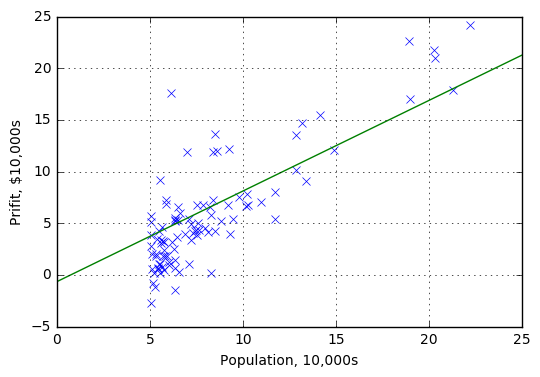

In [18]:
def lin_reg_model(x):
    return -0.6539 + x * 0.87678

line_segment = np.linspace(0, 25, 1000)
plt.plot(data['area'], data['price'], 'x')
plt.plot(line_segment, lin_reg_model(line_segment))
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)

### Prediction

In [19]:
abs(-2)

2

In [20]:
y_test[1, 0]

0.55657000000000001

In [21]:
def calcAccuracy(X, y, theta):
    m = len(X)
    s = 0
    for i in range(0, m):
        s = s + (np.dot(X[i], theta) - y[i, 0])**2
    s = s / m
    return s

In [22]:
print('Accuracy is {:.2f}'.format(calcAccuracy(X_test, y_test, t)))

Accuracy is 11.03


### Cross Validation

In [58]:
def logisticRegressionCV(X, y, chunks_count):
    m = len(X)
    chunk_size = m // chunks_count
    for i in range(0, chunks_count):
        theta = [0, 0]
        print(i)
        test_start_index = i * chunk_size
        test_end_index = (i + 1) * chunk_size
        print(test_start_index)
        print(test_end_index)
        test_chunk_X = X[test_start_index:test_end_index]
        train_cunk_X = np.concatenate((X[:test_start_index], X[test_end_index:]), axis=0)
        test_chunk_y = y[test_start_index:test_end_index]
        train_cunk_y = np.concatenate((y[:test_start_index], y[test_end_index:]), axis=0)
        
        t, h = gradientDescent(train_cunk_X, train_cunk_y, theta, 0.001, 1000)
        
        print('theta {}: {}'.format(i, t))
        
        print('Accuracy is {:.2f}'.format(calcAccuracy(test_chunk_X, test_chunk_y, t)))

In [59]:
logisticRegressionCV(X, y, 5)

0
0
19
theta 0: [-0.81146097014986929, 0.83653958943733009]
Accuracy is 22.34
1
19
38
theta 1: [-0.36954238898978287, 0.76835576591102173]
Accuracy is 14.72
2
38
57
theta 2: [-0.57910706180146088, 0.89815293678336439]
Accuracy is 8.61
3
57
76
theta 3: [-0.50841394436394594, 0.87782187997824901]
Accuracy is 8.79
4
76
95
theta 4: [-0.56200966270414043, 0.89400958080659687]
Accuracy is 9.34


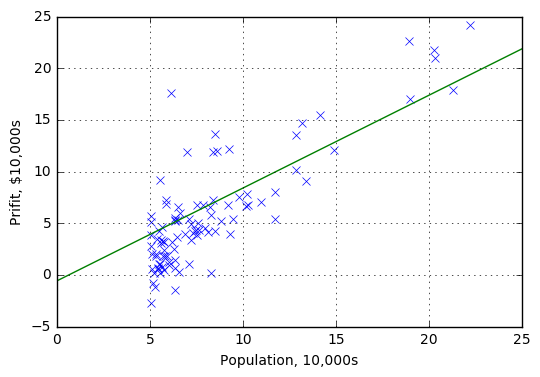

In [60]:
def lin_reg_model(x):
    return -0.5791 + x * 0.8981

line_segment = np.linspace(0, 25, 1000)
plt.plot(data['area'], data['price'], 'x')
plt.plot(line_segment, lin_reg_model(line_segment))
plt.xlabel('Population, 10,000s')
plt.ylabel('Prifit, $10,000s')
plt.grid(True)